In [67]:
from cpymad.madx import Madx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from pybt.tools.plotters import *
from matplotlib.patches import Ellipse, Rectangle
import requests
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
from madxtools.plot_tool import *
from pybt.tools.particles import *
from pybt.tools.plotters import *
from scipy.stats import *

from t07_functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [68]:
p, exn, eyn, betx0, bety0, alfx0, alfy0, Dx0, Dy0, Dpx0, Dpy0, ex, ey, sige = calc_initial_condition(2.0)

#################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("madx_files/f61t07.seq")
madx.call("madx_files/f61t07.str")

madx.command.beam(particle='PROTON',pc=p,exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')

madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
# madx.input('SELECT, FLAG=aperture, COLUMN=apertype;')

madx.input("kQFN1 = "+str(0.4797)+";")
madx.input("kQDN2 = "+str(-0.173)+";")
madx.input("kQFN3 = "+str(0.1986)+";")

# madx.input("kQFN4 = "+str(0.4797)+";")
# madx.input("kQDN5 = "+str(-0.173)+";")
# madx.input("kQFN6 = "+str(0.1986)+";")
# madx.input("kQFN7 = "+str(0.4797)+";")
# madx.input("kQDN8 = "+str(-0.173)+";")

madx.use(sequence="f61t07")
twiss_f61t07 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

plot_graph_with_dispersion(twiss_f61t07, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,2,2])

10.706294697042374
gamma = 11.414
beta = 0.996
p = 10.706 GeV/c


In [69]:
############################## CREATE PARTICLES DISTRIBUTION ##############################

number_of_particles = 1000
# Random distributionsa
x = np.random.normal(0, 0.03, number_of_particles)
xp = np.random.normal(0, 0.003, number_of_particles)
y = np.random.normal(0, 0.02, number_of_particles)
yp = np.random.normal(0, 0.002, number_of_particles)
pt = np.random.normal(0, sige, number_of_particles)

dist = beam_distrib_norm(alfx0, betx0, ex, number_of_particles, 1)
x = dist[:, 0]
xp = dist[:, 1]
dist = beam_distrib_norm(alfy0, bety0, ey, number_of_particles, 1)
y = dist[:, 0]
yp = dist[:, 1]

init_dist = np.column_stack((x, xp, y, yp, pt))

In [140]:
import scipy.optimize as optimize
import pybobyqa

instrument_focal_point = "t07.end"


def optimise(params):
    # k_QFN1, k_QDN2, k_QFN3, k_QFN4, k_QFN5, k_QDN6, k_QDN7, k_QDN8, k_QDN9, k_QDN10, k_QDN11, kOCT1, kOCT2 = params
    k_QFN1, k_QDN2, k_QFN3, k_QFN4, k_QFN5, k_QDN6, k_QDN7, k_QDN8, k_QDN9, k_QDN10, k_QDN11 = params
    print(params)
    #################################### Initialize MADX ####################################
    with open('tempfile', 'w') as f:
        madx = Madx(stdout=f,stderr=f)
        madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

    madx.call("madx_files/f61t07.seq")
    madx.call("madx_files/f61t07.str")

    madx.command.beam(particle='PROTON',pc=p,exn=exn,eyn=eyn)
    madx.input('BRHO      := BEAM->PC * 3.3356;')

    madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')


    madx.input("kQFN1 = "+str(k_QFN1)+";")
    madx.input("kQDN2 = "+str(k_QDN2)+";")
    madx.input("kQFN3 = "+str(k_QFN3)+";")
    madx.input("kQFN4 = "+str(k_QFN4)+";")
    madx.input("kQFN5 = "+str(k_QFN5)+";")
    madx.input("kQDN6 = "+str(k_QDN6)+";")
    madx.input("kQDN7 = "+str(k_QDN7)+";")
    madx.input("kQDN8 = "+str(k_QDN8)+";")
    madx.input("kQDN9 = "+str(k_QDN9)+";")
    madx.input("kQDN10 = "+str(k_QDN10)+";")
    madx.input("kQDN11 = "+str(k_QDN11)+";")
    # madx.input("kOCT1 = "+str(kOCT1)+";")
    # madx.input("kOCT2 = "+str(kOCT2)+";")



    madx.use(sequence="f61t07")
    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

    beam_size_H = beam_size(twiss['betx'], twiss['dx'], ex, sige, 1)
    beam_size_V = beam_size(twiss['bety'], twiss['dy'], ey, sige, 1)
    beam_size_objective_total = beam_size_H.sum() + beam_size_V.sum()

    beam_size_H_oct1 = np.abs(twiss['betx']["t07.oct1"])
    beam_size_V_oct2 = np.abs(twiss['bety']["t07.oct2"])
    beam_size_objective_octupoles = beam_size_H_oct1 + beam_size_V_oct2

    beam_size_H = -np.abs(beam_size(twiss['betx']["t07.oct2"], twiss['dx']["t07.oct2"], ex, sige, 1))
    beam_size_V = -np.abs(beam_size(twiss['bety']["t07.oct1"], twiss['dy']["t07.oct1"], ey, sige, 1))
    beam_size_objective_beam_size_oct = beam_size_H + beam_size_V

    dispersion_objective = np.abs(twiss.dx["t07.end"]) + np.abs(twiss.dx["t07.marker_mbxhd001_start"]) + np.abs(twiss.dx["t07.marker_mbxhd004_end"])

    # PTC
    madx.input('''
    USE, SEQUENCE = f61t07;
    PTC_CREATE_UNIVERSE;
    PTC_CREATE_LAYOUT, MODEL = 1, METHOD = 2, EXACT = FALSE, NST = 4;
    ''')

    for name in twiss.index:
        madx.input(f"PTC_OBSERVE, PLACE = {name};")

    for particle in init_dist:
        madx.input(f'PTC_START, X= {particle[0]}, px={particle[1]}, y={particle[2]}, py={particle[3]}, pt={particle[4]};')
        
    madx.input('''
    PTC_TRACK, TURNS=1, ICASE=5, ELEMENT_BY_ELEMENT=TRUE, DUMP=FALSE, ONETABLE=TRUE, RECLOSS=TRUE, CLOSED_ORBIT=FALSE, MAXAPER={100,100,100,100,100,100};
    PTC_TRACK_END;
    ''')

    ptc_output = madx.table.trackone.dframe()
    ptc_lost = madx.table.trackloss.dframe()

    print(f"PTC LOST PARTICLES = {len(ptc_lost)}")

    location = "t07.end"
    x = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().x
    px = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().px
    y = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().y
    py = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().py
    


    # data = x
    # data_min, data_max = np.min(data), np.max(data)
    # uniform_dist = uniform(loc=data_min, scale=data_max-data_min)
    # statistic, p_valueH = kstest(data, uniform_dist.cdf)
    # data = y
    # data_min, data_max = np.min(data), np.max(data)
    # uniform_dist = uniform(loc=data_min, scale=data_max-data_min)
    # statistic, p_valueV = kstest(data, uniform_dist.cdf)
    # print(f"p_valueH = {p_valueH:.2e}, p_valueV = {p_valueV:.2e}")
    # uniform_objective = -p_valueH + -p_valueV

    objective =  len(ptc_lost) + beam_size_objective_octupoles + dispersion_objective/100 + beam_size_objective_beam_size_oct
    
    print (f"OJECTIVE = {objective}")
    return objective


initial_guess = np.array([0.49169281, -0.18724771, 0.2141998, -0.07838403, 0.18776787, -0.19220195, 0.0, 0.0, 0.0, 0.0, 0.0])

lower = np.array([0.0, -0.221974, 0.0, -0.5, 0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5])
upper = np.array([0.53823, 0., 0.215518, 0.0, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5])


soln = pybobyqa.solve(optimise, initial_guess, bounds=(lower,upper), rhobeg = 0.5, rhoend=0.001, scaling_within_bounds=True, seek_global_minimum=False, objfun_has_noise=False, maxfun=1000)
print(soln)

[ 0.49169281 -0.18724771  0.2141998  -0.07838403  0.18776787 -0.19220195
  0.          0.          0.          0.          0.        ]
PTC LOST PARTICLES = 0
OJECTIVE = 181.11172597968277
[ 0.53823    -0.18724771  0.2141998  -0.07838403  0.18776787 -0.19220195
  0.          0.          0.          0.          0.        ]
PTC LOST PARTICLES = 0
OJECTIVE = 193.0220310434619
[ 0.49169281 -0.07626071  0.2141998  -0.07838403  0.18776787 -0.19220195
  0.          0.          0.          0.          0.        ]
PTC LOST PARTICLES = 0
OJECTIVE = 2270.923628107958
[ 0.49169281 -0.18724771  0.215518   -0.07838403  0.18776787 -0.19220195
  0.          0.          0.          0.          0.        ]
PTC LOST PARTICLES = 0
OJECTIVE = 181.63250583077735
[ 0.49169281 -0.18724771  0.2141998   0.          0.18776787 -0.19220195
  0.          0.          0.          0.          0.        ]
PTC LOST PARTICLES = 0
OJECTIVE = 181.11172597968277
[ 0.49169281 -0.18724771  0.2141998  -0.07838403  0.43776787 -

10.706294697042374
gamma = 11.414
beta = 0.996
p = 10.706 GeV/c


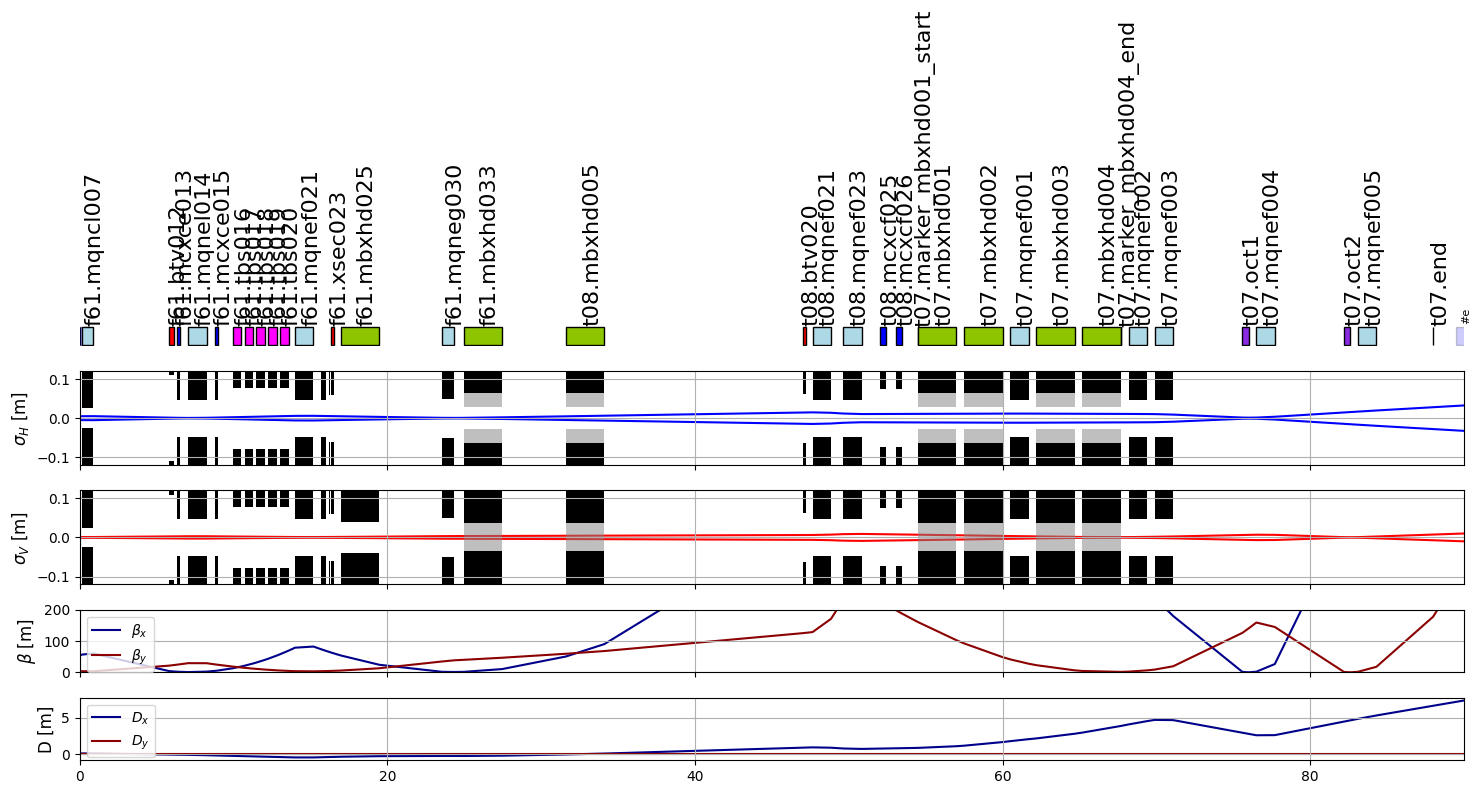

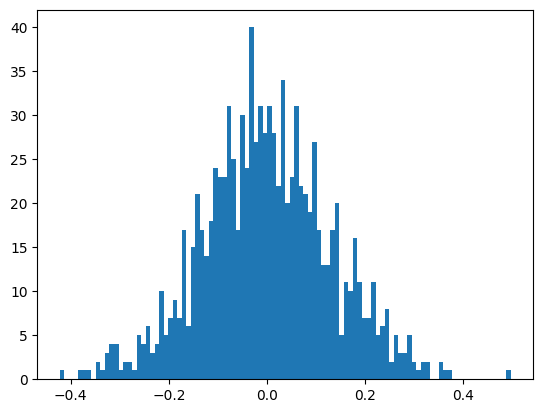

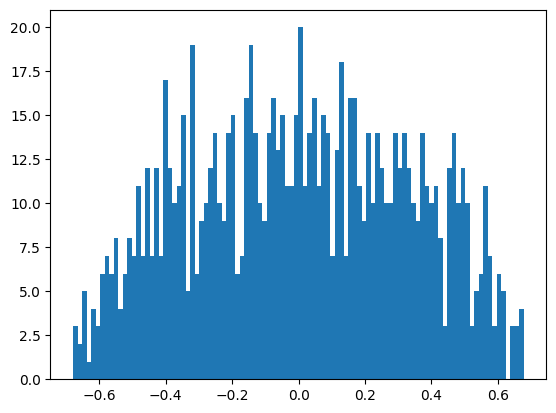

In [159]:
p, exn, eyn, betx0, bety0, alfx0, alfy0, Dx0, Dy0, Dpx0, Dpy0, ex, ey, sige = calc_initial_condition(2.0)

#################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("madx_files/f61t07.seq")
madx.call("madx_files/f61t07.str")

madx.command.beam(particle='PROTON',pc=p,exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')

madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')

madx.input("kQFN1 = "+str(soln.x[0])+";")
madx.input("kQDN2 = "+str(soln.x[1])+";")
madx.input("kQFN3 = "+str(soln.x[2])+";")
madx.input("kQFN4 = "+str(soln.x[3])+";")
madx.input("kQFN5 = "+str(soln.x[4])+";")
madx.input("kQDN6 = "+str(soln.x[5])+";")
madx.input("kQDN7 = "+str(soln.x[6])+";")
madx.input("kQDN8 = "+str(soln.x[7])+";")
madx.input("kQDN9 = "+str(soln.x[8])+";")
madx.input("kQDN10 = "+str(soln.x[9])+";")
madx.input("kQDN11 = "+str(soln.x[10])+";")
madx.input("kOCT1 = "+str(4000)+";")
madx.input("kOCT2 = "+str(0)+";")

madx.use(sequence="f61t07")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

plot_graph_with_dispersion(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,2,2])


madx.input('''
USE, SEQUENCE = f61t07;
PTC_CREATE_UNIVERSE;
PTC_CREATE_LAYOUT, MODEL = 1, METHOD = 2, EXACT = FALSE, NST = 4;
''')

for name in twiss.index:
    madx.input(f"PTC_OBSERVE, PLACE = {name};")

# madx.input("PTC_START, X = 0.03, PX = 0.002, Y = 0.00, PY = 0.000, PT=0.1")
for particle in init_dist:
    madx.input(f'PTC_START, X= {particle[0]}, px={particle[1]}, y={particle[2]}, py={particle[3]}, pt={particle[4]};')
    
madx.input('''
PTC_TRACK, TURNS=1, ICASE=5, ELEMENT_BY_ELEMENT=TRUE, DUMP=FALSE, ONETABLE=TRUE, RECLOSS=TRUE, CLOSED_ORBIT=FALSE, MAXAPER={100,100,100,100,100,100};
PTC_TRACK_END;
''')

ptc_output = madx.table.trackone.dframe()
ptc_lost = madx.table.trackloss.dframe()



fig, ax = plt.subplots(3,1, figsize=(10, 8), height_ratios=[1,2,2])

draw_synoptic(ax[0], twiss)
ax[0].set_xlim(0,twiss.s[-1])
ax[0].set_ylim(-0.01,1.)
ax[0].axis("off")

for i in range(int(number_of_particles)):
    i=i+1

    ax[1].plot(ptc_output[ptc_output.number == i].s, ptc_output[ptc_output.number == i].x, color="b", alpha=0.05)
    ax[2].plot(ptc_output[ptc_output.number == i].s, ptc_output[ptc_output.number == i].y, color="r", alpha=0.05)

draw_aperture_rectcircle(ax[1], ax[2], twiss,"aper_1", "aper_2", "aper_3")
draw_aperture_racetrackH(ax[1], twiss,"aper_1", "aper_2", "aper_3","aper_4")
draw_aperture_circle(ax[1], twiss, "aper_1")
draw_aperture_rectangle(ax[1], twiss, "aper_1")

draw_aperture_racetrackV(ax[2], twiss,"aper_1", "aper_2", "aper_3","aper_4")
draw_aperture_circle(ax[2], twiss, "aper_1")
draw_aperture_rectangle(ax[2], twiss, "aper_2")

ax[1].set_xlim(0,twiss.s[-1])
ax[2].set_xlim(0,twiss.s[-1])
ax[1].set_ylim(-0.2, 0.2)
ax[2].set_ylim(-0.2, 0.2)


location = "t07.end"

x = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().x
x = np.array(x)*100
px = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().px
px = np.array(px)*1000
y = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().y
y = np.array(y)*100
py = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().py
py = np.array(py)*1000


fig, ax = plt.subplots()
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x, y, c=z, s=20)
ax.set_xlabel("[cm]")
ax.set_ylabel("[cm]")

location = "t07.oct1"

x = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().x
x = np.array(x)*100
px = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().px
px = np.array(px)*1000
y = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().y
y = np.array(y)*100
py = ptc_output.where(ptc_output.s == twiss.loc[location].s).dropna().py
py = np.array(py)*1000


fig, ax = plt.subplots()
xy = np.vstack([x,xp])
z = gaussian_kde(xy)(xy)
ax.scatter(x, xp, c=z, s=20)
ax.set_xlabel("x")
ax.set_ylabel("xp")

fig, ax = plt.subplots()
ax.hist(x, bins=100);
fig, ax = plt.subplots()
ax.hist(y, bins=100);

K-S statistic: 0.1967481593634839, p-value: 2.151348195178266e-34
The data does not come from a uniform distribution (reject null hypothesis).


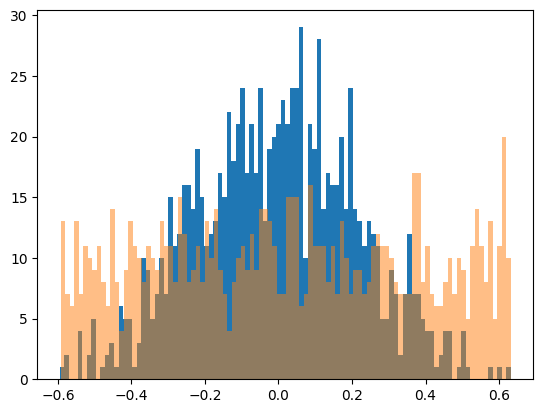

In [153]:
import numpy as np
from scipy.stats import kstest, uniform

data = x
data_min, data_max = np.min(data), np.max(data)
uniform_dist = uniform(loc=data_min, scale=data_max-data_min)
statistic, p_value = kstest(data, uniform_dist.cdf)

# Interpret the results
if p_value < 0.05:
    print(f"K-S statistic: {statistic}, p-value: {p_value}")
    print("The data does not come from a uniform distribution (reject null hypothesis).")
else:
    print(f"K-S statistic: {statistic}, p-value: {p_value}")
    print("The data comes from a uniform distribution (fail to reject null hypothesis).")

fig, ax = plt.subplots()
ax.hist(data, bins=100);
ax.hist(uniform_dist.rvs(1000), bins=100, alpha=0.5);


K-S statistic: 0.07456583625094429, p-value: 2.7866783252283497e-05
The data does not come from a uniform distribution (reject null hypothesis).


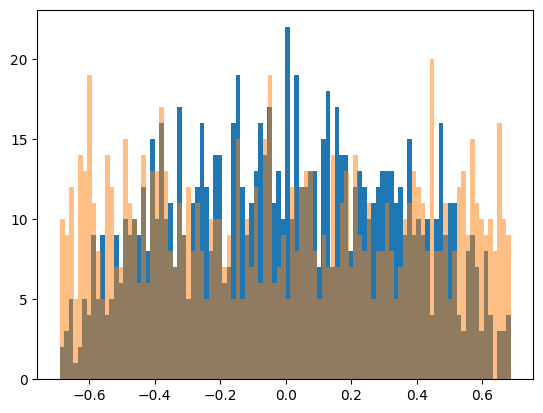

In [154]:
data = y
data_min, data_max = np.min(data), np.max(data)
uniform_dist = uniform(loc=data_min, scale=data_max-data_min)
statistic, p_value = kstest(data, uniform_dist.cdf)

# Interpret the results
if p_value < 0.05:
    print(f"K-S statistic: {statistic}, p-value: {p_value}")
    print("The data does not come from a uniform distribution (reject null hypothesis).")
else:
    print(f"K-S statistic: {statistic}, p-value: {p_value}")
    print("The data comes from a uniform distribution (fail to reject null hypothesis).")

fig, ax = plt.subplots()
ax.hist(data, bins=100);
ax.hist(uniform_dist.rvs(1000), bins=100, alpha=0.5);
